In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv (r"C:\Users\Ali\Documents\python\ab_test_data.csv")

In [6]:
df.head()

,user_id,timestamp,test_group,conversion
0,7f6833e6-1141-4f20-b4b2-f1e31019b1fd,2023-07-04 4:40:56,a,0
1,e6a6e960-d3f3-4074-a516-ba1e609b211e,2023-07-06 0:26:45,b,0
2,4d3fbfa5-6847-410a-bac2-477f01d5f400,2023-07-10 20:24:34,b,0
3,361457d9-a044-48f7-981c-d67dc3861679,2023-07-20 7:04:50,b,0
4,285cd63d-7d03-427f-a062-1fa2dd2e77d6,2023-07-19 23:27:50,b,0


In [8]:
df.shape

(19998, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     19998 non-null  object
 1   timestamp   19998 non-null  object
 2   test_group  19998 non-null  object
 3   conversion  19998 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 625.1+ KB


In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     19998 non-null  object        
 1   timestamp   19998 non-null  datetime64[ns]
 2   test_group  19998 non-null  object        
 3   conversion  19998 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 625.1+ KB


- 1-1)  A ve B gruplarındaki kullanıcı sayısı:

In [17]:
user_counts = df['test_group'].value_counts()
print(user_counts)

test_group
a    10013
b     9985
Name: count, dtype: int64


- 1-2)A ve B gruplarındaki dönüşüm sayısı;

In [20]:
conversion_counts = df.groupby('test_group')['conversion'].sum()
print(conversion_counts)

test_group
a    611
b    889
Name: conversion, dtype: int64


- 1-3) A ve B gruplarındaki dönüşüm oranı;

In [23]:
conversion_rates = df.groupby('test_group')['conversion'].mean()
print(conversion_rates)


test_group
a    0.061021
b    0.089034
Name: conversion, dtype: float64


- 1-4)Testin başlangıç tarihi, bitiş tarihi ve testin süresi (gün olarak)

In [26]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
start_date = df['timestamp'].min()
end_date = df['timestamp'].max()
test_duration = (end_date - start_date).days

print(f"Testin başlangıç tarihi: {start_date}")
print(f"Testin bitiş tarihi: {end_date}")
print(f"Testin süresi: {test_duration} gün")


Testin başlangıç tarihi: 2023-07-03 01:42:34
Testin bitiş tarihi: 2023-07-25 01:41:19
Testin süresi: 21 gün


- 2. Hipotez testleri için istediğiniz istatistiksel kriteri seçin ve istatistik değerlerini ve p-değerini hesaplayın. Null hipotezini reddedip edemeyeceğimizi kontrol edin. Hangi kriteri kullandığınızı belirtmeyi unutmayın 😉

##### -T-TEST

In [30]:
from scipy import stats

alpha = 0.05
statistic, pvalue = stats.ttest_ind(df[df['test_group'] == 'a']['conversion'],
                                    df[df['test_group'] == 'b']['conversion'],
                                    alternative='less')  

print(f't-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}')

if pvalue < alpha:
    print('Fark istatistiksel olarak anlamlıdır. H0 reddedilir.')
else:
    print('Fark istatistiksel olarak anlamlı değildir. H0 reddedilemez.')


t-statistic: -7.53, p-value: 0.0
Fark istatistiksel olarak anlamlıdır. H0 reddedilir.


- 3) 95% güven aralıkları ile gruplar arasındaki ortalama değerlerin karşılaştırılması için bir görselleştirme oluşturun.

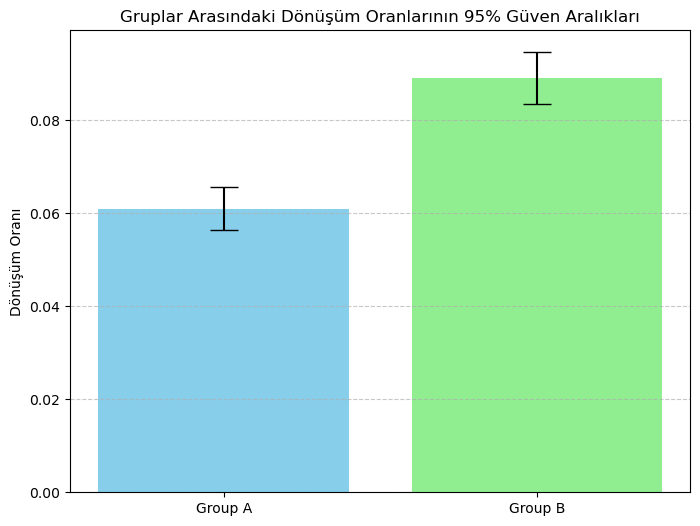

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
group_a = df[df['test_group'] == 'a']['conversion']
group_b = df[df['test_group'] == 'b']['conversion']

mean_a = np.mean(group_a)
mean_b = np.mean(group_b)
sem_a = stats.sem(group_a)  
sem_b = stats.sem(group_b)

ci_a = stats.t.interval(0.95, len(group_a)-1, loc=mean_a, scale=sem_a)
ci_b = stats.t.interval(0.95, len(group_b)-1, loc=mean_b, scale=sem_b)

plt.figure(figsize=(8, 6))
plt.bar(['Group A', 'Group B'], [mean_a, mean_b], yerr=[mean_a-ci_a[0], mean_b-ci_b[0]], capsize=10, color=['skyblue', 'lightgreen'])
plt.ylabel('Dönüşüm Oranı')
plt.title('Gruplar Arasındaki Dönüşüm Oranlarının 95% Güven Aralıkları')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


- 4)Bu konuda okuduğunuz önerilere göre A/B testinin sonuçları hakkında çıkarımlar hazırlayın.

##### Grup A ile Grup B arasındaki farkın istatistiksel olarak anlamlı olduğu söylenebilir. Grup A ve Grup B'nin ortalama dönüşüm oranları arasındaki fark grafikte net bir şekilde görünüyor. Grup B'nin ortalama dönüşüm oranının Grup A'dan daha yüksek olduğunu da görüyoruz. Bu da, Grup B'de uygulanan stratejinin (abonelikte %50 indirim) Grup A'ya kıyasla daha etkili olduğunu gösteriyor.

- #### Bonus Görevi
-
Zaman içinde dönüşüm oranının değişimini gösteren bir grafik oluşturun.

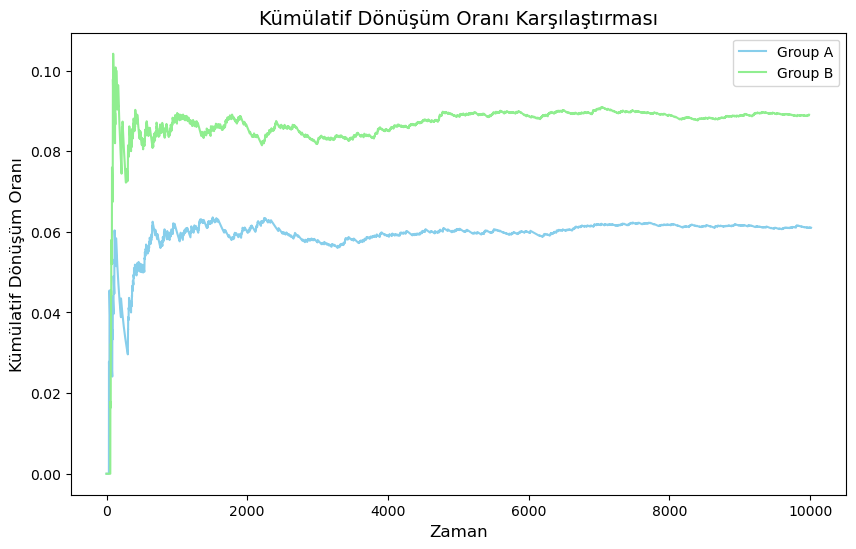

In [38]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df = df.sort_values(by='timestamp').reset_index(drop=True)

cumulative_metric_a = df[df['test_group'] == 'a']['conversion'].expanding().mean().reset_index(drop=True)
cumulative_metric_b = df[df['test_group'] == 'b']['conversion'].expanding().mean().reset_index(drop=True)


plt.figure(figsize=(10, 6))
plt.plot(cumulative_metric_a, label='Group A', color='skyblue')
plt.plot(cumulative_metric_b, label='Group B', color='lightgreen')


plt.title('Kümülatif Dönüşüm Oranı Karşılaştırması', fontsize=14)
plt.xlabel('Zaman', fontsize=12)
plt.ylabel('Kümülatif Dönüşüm Oranı', fontsize=12)
plt.legend()
plt.show()
